# **Merge Data**

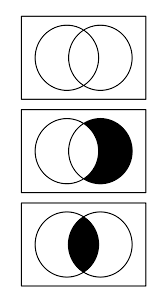

In [29]:
import numpy as np
import pandas as pd


In [30]:
# First we create two DataFrames, staff and students.
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
# And lets index these staff by name
staff_df = staff_df.set_index('Name')
# Now we'll create a student dataframe
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
# And we'll index this by name too
student_df = student_df.set_index('Name')

# And lets just print out the dataframes
print(staff_df.head())
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader
            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [31]:
df_final = pd.merge(staff_df,student_df,how="outer",left_index=True,right_index=True) ## Hacemos el merge con todos los datos sin importar el conjunto al que pertenencen 
df_final

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [32]:
df_final = pd.merge(staff_df,student_df,how="inner",left_index=True,right_index=True) ## Hacemos el mege unicamente con los elementos que pertenecen a los 2 conjuntos
df_final

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [33]:
df_final = pd.merge(staff_df,student_df,how="left",left_index=True,right_index=True) ## Hacemos el merge con los elementos que pertenecen a al conjunto izquierdo y ademas accedemos 
df_final                                                                             ## al estado en el que se encuentran en el conjunto derecho 

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [34]:
###### EL Merge anterior se hace por de la comparacion con los indices

# Sin embargo podemos utilizar unicamente columnas

staff_df = staff_df.reset_index()
student_df = student_df.reset_index()

pd.merge(staff_df,student_df,"outer",on="Name")

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business
3,Mike,NaN,Law


## Como se toman los conflictos:

In [35]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 
                          'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 
                          'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 
                          'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 
                            'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 
                            'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 
                            'Location': '512 Wilson Crescent'}])

pd.merge(staff_df,student_df,"outer",on="Name") ##### Los elementos _x siempre van a coincidir con la informacion del conjunto de la izquierda
                                                ##### Los elementos _y pertenencen al conjunto de la derecha

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue
3,Mike,NaN,NaN,Law,Fraternity House #22


## Como hacer merge con varias columnas

In [36]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 
                          'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 
                          'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 
                          'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 
                            'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 
                            'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 
                            'School': 'Engineering'}])

pd.merge(staff_df,student_df,"outer",on=["First Name","Last Name"])

,First Name,Last Name,Role,School
0,Kelly,Desjardins,Director of HR,NaN
1,Sally,Brooks,Course liasion,Engineering
2,James,Wilde,Grader,NaN
3,James,Hammond,NaN,Business
4,Mike,Smith,NaN,Law


In [62]:
%%capture
df_2012 = pd.read_csv(filepath_or_buffer="college_scorecard/MERGED2012_13_PP.csv")
df_2013 = pd.read_csv(filepath_or_buffer="college_scorecard/MERGED2013_14_PP.csv")


In [66]:
frames = [df_2012,df_2013]
len(df_2012)

7793

In [72]:
df = pd.concat(frames,keys=["2012","2013"]) ## Podemos agregar keys para que los elementos tengas el atributo de que conjunto pertenencian anteriormente
df

UNITID    OPEID  OPEID6  \
2012 0       100654   100200    1002   
     1       100663   105200    1052   
     2       100690  2503400   25034   
     3       100706   105500    1055   
     4       100724   100500    1005   
...             ...      ...     ...   
2013 7799  48285703   157107    1571   
     7800  48285704   157101    1571   
     7801  48285705   157105    1571   
     7802  48285706   157100    1571   
     7803  48285707   157103    1571   

                                                  INSTNM            CITY  \
2012 0                          Alabama A & M University          Normal   
     1               University of Alabama at Birmingham      Birmingham   
     2                                Amridge University      Montgomery   
     3               University of Alabama in Huntsville      Huntsville   
     4                          Alabama State University      Montgomery   
...                                                  ...             ...   
2013 7799       Georgia Military College-Columbus Campus        Columbus   
     7800       Georgia Military College-Valdosta Campus        Valdosta   
     7801  Georgia Military College-Warner Robins Campus   Warner Robins   
     7802                Georgia Military College-Online   Milledgeville   
     7803        Georgia Military College-Stone Mountain  Stone Mountain   

          STABBR         ZIP  ACCREDAGENCY  INSTURL  NPCURL  ...  \
2012 0        AL       35762           NaN      NaN     NaN  ...   
     1        AL  35294-0110           NaN      NaN     NaN  ...   
     2        AL  36117-3553           NaN      NaN     NaN  ...   
     3        AL       35899           NaN      NaN     NaN  ...   
     4        AL  36104-0271           NaN      NaN     NaN  ...   
...          ...         ...           ...      ...     ...  ...   
2013 7799     GA       31909           NaN      NaN     NaN  ...   
     7800     GA       31605           NaN      NaN     NaN  ...   
     7801     GA       31093           NaN      NaN     NaN  ...   
     7802     GA       31061           NaN      NaN     NaN  ...   
     7803     GA       30083           NaN      NaN     NaN  ...   

           OMAWDP8_NOTFIRSTTIME_POOLED_SUPP  OMENRUP_NOTFIRSTTIME_POOLED_SUPP  \
2012 0                                  NaN                               NaN   
     1                                  NaN                               NaN   
     2                                  NaN                               NaN   
     3                                  NaN                               NaN   
     4                                  NaN                               NaN   
...                                     ...                               ...   
2013 7799                               NaN                               NaN   
     7800                               NaN                               NaN   
     7801                               NaN                               NaN   
     7802                               NaN                               NaN   
     7803                               NaN                               NaN   

           OMENRYP_FULLTIME_POOLED_SUPP  OMENRAP_FULLTIME_POOLED_SUPP  \
2012 0                              NaN                           NaN   
     1                              NaN                           NaN   
     2                              NaN                           NaN   
     3                              NaN                           NaN   
     4                              NaN                           NaN   
...                                 ...                           ...   
2013 7799                           NaN                           NaN   
     7800                           NaN                           NaN   
     7801                           NaN                           NaN   
     7802                           NaN                           NaN   
     7803                 